In [39]:
import env 
import acquire
import prepare
import model
import split_scale
from sklearn.preprocessing import LabelEncoder

In [22]:
import seaborn as sns
import pandas as pd
import numpy as np

In [30]:
from matplotlib.pyplot import show
sns.set(style="darkgrid")

In [10]:
monthly_df = acquire.get_month2month()

In [12]:
monthly_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0135-NMXAP,Female,0,No,No,12,Yes,Yes,2,No,...,No,No,Yes,No,1,Yes,3,89.75,1052.4,Yes
1,0208-BPQEJ,Female,0,Yes,Yes,12,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,1,No,3,19.40,198.1,No
2,0282-NVSJS,Female,1,Yes,Yes,12,No,No phone service,1,No,...,No,Yes,No,No,1,Yes,2,29.30,355.9,No
3,0547-HURJB,Male,0,No,Yes,12,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,1,No,4,21.05,235.8,No
4,0603-OLQDC,Male,0,No,Yes,12,Yes,No,1,Yes,...,No,No,Yes,Yes,1,Yes,2,69.85,837.5,No


In [5]:
annual_df = acquire.get_1year()

In [6]:
annual_df.size

462

In [18]:
monthly_df.size

1806

In [7]:
annual_df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,1038-ZAGBI,Female,0,Yes,Yes,12,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,2,No,3,19.80,229.6,Yes
1,1429-UYJSV,Female,0,No,No,12,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,2,No,2,19.70,260.9,No
2,1680-VDCWW,Male,0,Yes,No,12,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,2,No,3,19.80,202.25,No
3,1699-HPSBG,Male,0,No,No,12,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,1,59.80,727.8,Yes
4,2316-ESMLS,Female,0,Yes,Yes,12,No,No phone service,1,Yes,...,No,Yes,No,No,2,No,4,33.15,444.75,No


In [15]:
both = pd.concat([annual_df, monthly_df])

In [16]:
both.size

2268

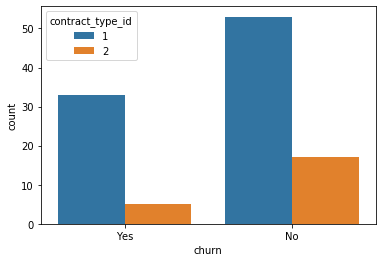

In [20]:
sns.countplot(x='churn', data=both, hue='contract_type_id')

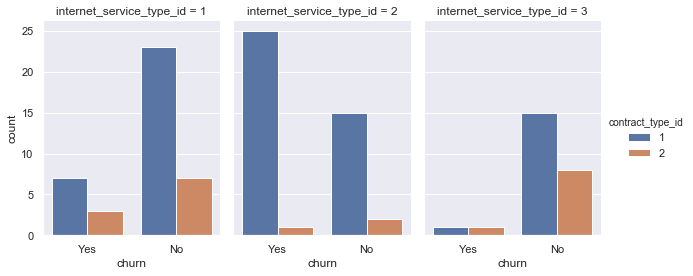

In [33]:
g = sns.catplot(x="churn", hue="contract_type_id", col="internet_service_type_id", data=both, kind="count", height=4, aspect=.7);

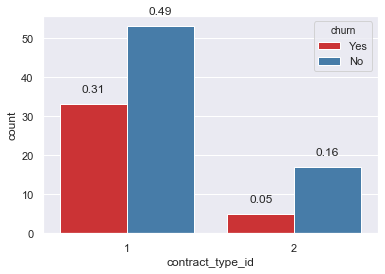

In [32]:
total = float(len(both)) # one person per row 
#ax = sns.barplot(x="class", hue="who", data=titanic)
ax = sns.countplot(x="contract_type_id", hue="churn", data=both, palette="Set1") # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
show()

# QUESTION: price threshold for specific services where the likelihood of churn increases

In [34]:
telco = prepare.prep_telco()

In [35]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 20 columns):
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null object
dependents                  7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null object
multiple_lines              7043 non-null object
internet_service_type_id    7043 non-null int64
online_security             7043 non-null object
online_backup               7043 non-null object
device_protection           7043 non-null object
tech_support                7043 non-null object
streaming_tv                7043 non-null object
streaming_movies            7043 non-null object
contract_type_id            7043 non-null int64
paperless_billing           7043 non-null object
payment_type_id             7043 non-null int64
monthly_charges             7043 non-null float64
total

In [36]:
def encode_variable(column, df):
    lab_enc = LabelEncoder()
    lab_enc.fit(df[column])
    df[column] = lab_enc.transform(df[column])

In [41]:
cat_cols = telco.select_dtypes('object').columns
for i in cat_cols:
    encode_variable(i, telco)

In [42]:
telco.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
customer_id,,,,,,,,,,,,,,,,,,,,
0002-ORFBO,0,0,1,1,9,1,0,1,0,2,0,2,2,0,2,1,2,65.6,593.30,0
0003-MKNFE,1,0,0,0,9,1,2,1,0,0,0,0,0,2,1,0,2,59.9,542.40,0
0004-TLHLJ,1,0,0,0,4,1,0,2,0,0,2,0,0,0,1,1,1,73.9,280.85,1
0011-IGKFF,1,1,1,0,13,1,0,2,0,2,2,0,2,2,1,1,1,98.0,1237.85,1
0013-EXCHZ,0,1,1,0,3,1,0,2,0,0,0,2,2,0,1,1,2,83.9,267.40,1


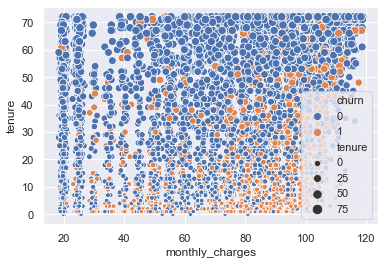

In [47]:
ax = sns.scatterplot(x="monthly_charges", y="tenure", hue="churn", size="tenure", data=telco)

# QUESTION: Feature with highest churn rate

In [53]:
both.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,1038-ZAGBI,Female,0,Yes,Yes,12,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,2,No,3,19.80,229.6,Yes
1,1429-UYJSV,Female,0,No,No,12,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,2,No,2,19.70,260.9,No
2,1680-VDCWW,Male,0,Yes,No,12,Yes,No,3,No internet service,...,No internet service,No internet service,No internet service,No internet service,2,No,3,19.80,202.25,No
3,1699-HPSBG,Male,0,No,No,12,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,1,59.80,727.8,Yes
4,2316-ESMLS,Female,0,Yes,Yes,12,No,No phone service,1,Yes,...,No,Yes,No,No,2,No,4,33.15,444.75,No


In [55]:
money = both[['monthly_charges','tenure','churn']]

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


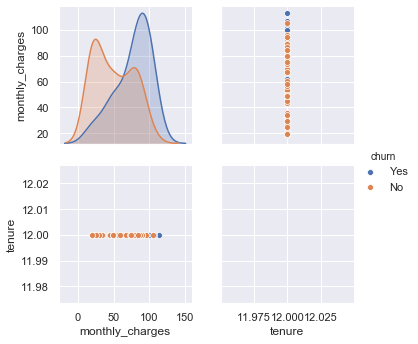

In [56]:
g = sns.pairplot(money, hue="churn")